# Download dataset from Kaggle

In [1]:
# Install Kaggle API
# !pip install kaggle

# # Make a directory for the Kaggle credentials and move the JSON file there
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Set permissions for the JSON file
# !chmod 600 ~/.kaggle/kaggle.json

# !cd ../data/

# # Download the dataset
# !kaggle datasets download -d manishkc06/startup-success-prediction

# # Unzip the downloaded file
# !unzip startup-success-prediction.zip

# !ls
!pip install yfinance
!pip install tweepy
!pip install wbdata pandas
! pip install xgboost


# Explore Data

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# load data:
df = pd.read_csv('../data/startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\1619564235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')


Text(0, 0.5, 'Number of Startups')

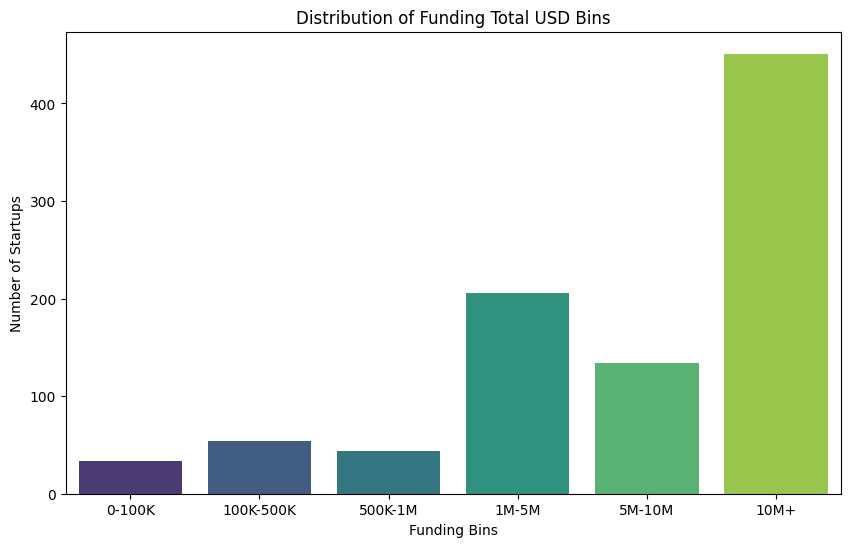

In [3]:
# plot funding bins using a bar plot
bin_edges = [0, 100000, 500000, 1000000, 5000000, 10000000, df['funding_total_usd'].max()] # binning funding_total_usd- i use this since histplot was unclear
bin_labels = ['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
df['funding_bins'] = pd.cut(df['funding_total_usd'], bins=bin_edges, labels=bin_labels, include_lowest=True)

funding_bin_counts = df['funding_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')
plt.title('Distribution of Funding Total USD Bins')
plt.xlabel('Funding Bins')
plt.ylabel('Number of Startups')


C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\541846371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Startup Status')

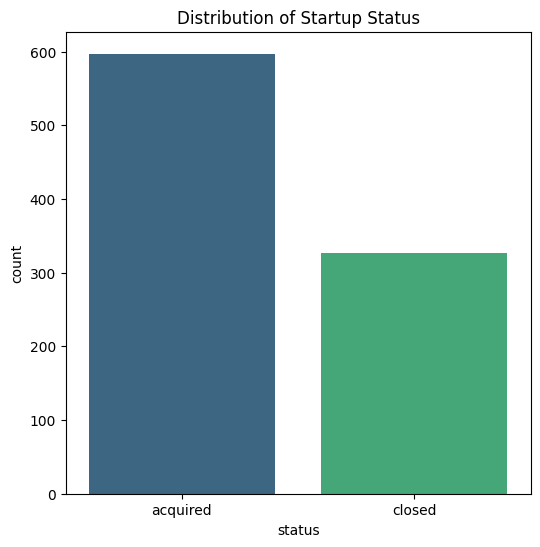

In [4]:
# Distribution of status
plt.figure(figsize=(6, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Startup Status')

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\2808052165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Startup Status')

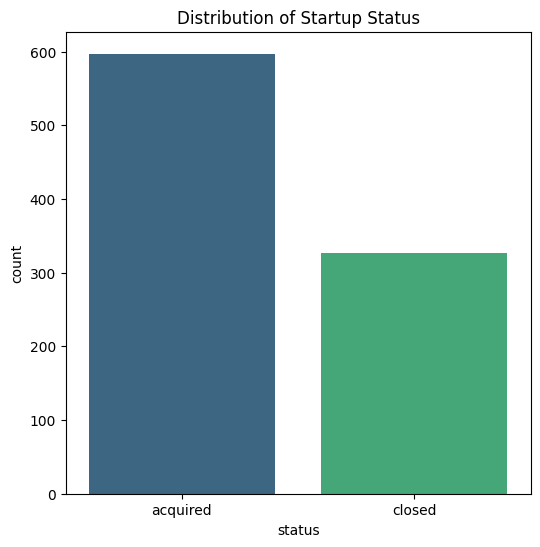

In [5]:
# Distribution of status
plt.figure(figsize=(6, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Startup Status')


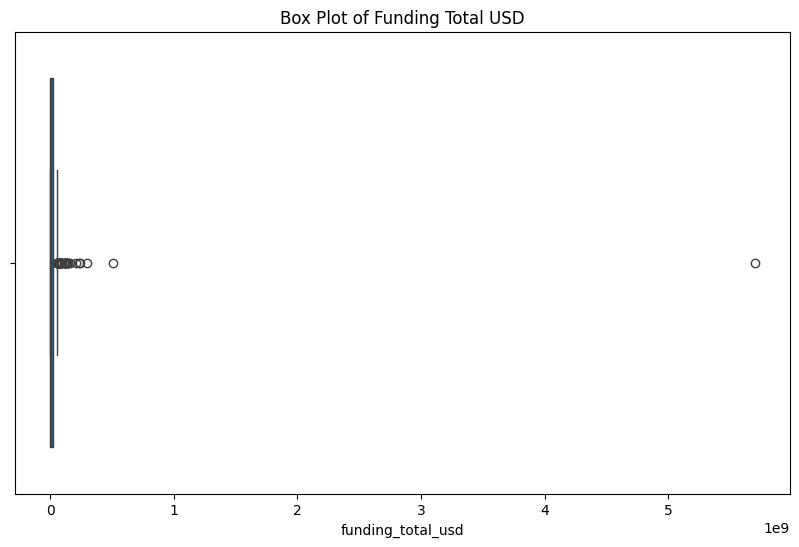

In [6]:
# Box plot for funding_total_usd- spot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='funding_total_usd', data=df)
plt.title('Box Plot of Funding Total USD')
plt.show()

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\3236160760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y='funding_rounds', data=df, palette='viridis')


Text(0.5, 1.0, 'Funding Rounds Distribution by Status')

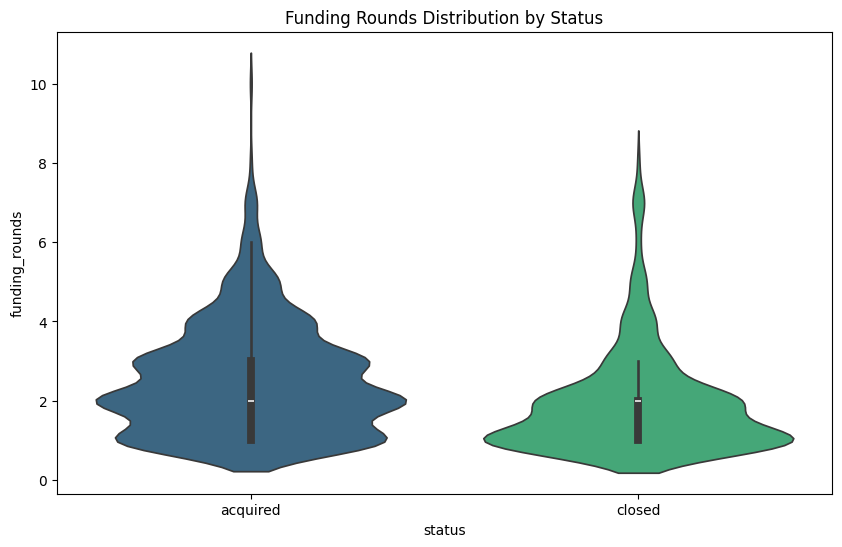

In [7]:
# Violin plot for funding rounds distribution by status
plt.figure(figsize=(10, 6))
sns.violinplot(x='status', y='funding_rounds', data=df, palette='viridis')
plt.title('Funding Rounds Distribution by Status')

## functions

### Utility functions

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, balanced_accuracy_score,  classification_report, ConfusionMatrixDisplay

def show_ConfusionMatrix_test(y_test, y_test_pred, test_confusion_matrix_title = "Confusion Matrix (Test)"):
  conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred)
  print("Confusion Matrix (Test):")
  print(conf_matrix_log_reg)
  ConfusionMatrixDisplay(conf_matrix_log_reg).plot()
  plt.title(test_confusion_matrix_title)
  plt.show()
'''
def find_optimal_threshold(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters:
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations

    Returns:
    list type, with optimal cutoff value
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])
'''

def get_precision_and_recall(y, y_pred):
  return round(precision_score(y, y_pred), 4), round(recall_score(y, y_pred), 4)

### add economic info

In [9]:
# Affect acquisitions
# Define the function to add NASDAQ annual changes
# def add_nasdaq_annual_changes(df):
#     years = np.arange(1984, 2024).tolist()
#     nasdaq_data = yf.download('^IXIC', start='1984-01-01', end='2024-01-01', interval='1mo')
#     nasdaq_data['Year'] = nasdaq_data.index.year
#     nasdaq_annual = nasdaq_data.groupby('Year')['Close'].last().pct_change().reset_index()
#     nasdaq_annual.columns = ['Year', 'NASDAQ_Annual_Change']
#     nasdaq_annual = nasdaq_annual[nasdaq_annual['Year'].isin(years)]
#     nasdaq_annual.set_index('Year', inplace=True)

#     for i in range(11):
#         df[f'nasdaq_annual_changes_at_year_{i}'] = df['founded_at_year'].apply(lambda x: nasdaq_annual['NASDAQ_Annual_Change'].get(x-i, np.nan))

#     return df


def add_nasdaq_annual_changes(df):
    years = np.arange(1984, 2024).tolist()
    nasdaq_data = yf.download('^IXIC', start='1984-01-01', end='2024-01-01', interval='1mo')
    nasdaq_data['Year'] = nasdaq_data.index.year
    nasdaq_annual = nasdaq_data.groupby('Year')['Close'].last().pct_change().reset_index()
    nasdaq_annual.columns = ['Year', 'NASDAQ_Annual_Change']
    nasdaq_annual = nasdaq_annual[nasdaq_annual['Year'].isin(years)]
    nasdaq_annual.set_index('Year', inplace=True)
    
    # Add columns for each year based on the maximum founded_at_year in the DataFrame
    max_year = df['founded_at_year'].max()
    for year in range(max_year, max_year - 11, -1):
        year_index = max_year - year
        df[f'nasdaq_annual_changes_at_year_{year_index}'] = df['founded_at_year'].apply(
            lambda x: nasdaq_annual.loc[year, 'NASDAQ_Annual_Change'] if year in nasdaq_annual.index else np.nan
        )
    
    return df


# Affect workforce and investments
def add_info_on_inflation_over_years(df):
  us_inflation_data = {
      1984: 4.3, 1985: 3.6, 1986: 1.9, 1987: 3.6, 1988: 4.1, 1989: 4.8,
      1990: 5.4, 1991: 4.2, 1992: 3.0, 1993: 2.7, 1994: 2.6, 1995: 2.8,
      1996: 3.0, 1997: 2.3, 1998: 1.6, 1999: 2.2, 2000: 3.4, 2001: 2.8,
      2002: 1.6, 2003: 2.3, 2004: 2.7, 2005: 3.4, 2006: 3.2, 2007: 2.8,
      2008: 3.8, 2009: -0.4, 2010: 1.6, 2011: 3.2, 2012: 2.1, 2013: 1.5,
      2014: 1.6, 2015: 0.1, 2016: 1.3, 2017: 2.1, 2018: 2.4, 2019: 1.8,
      2020: 1.2, 2021: 4.7, 2022: 8.0, 2023: 3.2, 2024: 2.5  # 2024 is an estimate
  }

  df['inflation_at_year_0'] = df['founded_at_year'].map(us_inflation_data)
  df['inflation_at_year_1'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-1, None))
  df['inflation_at_year_2'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-2, None))
  df['inflation_at_year_3'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-3, None))

  df['inflation_at_year_4'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-4, None))
  df['inflation_at_year_5'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-5, None))
  df['inflation_at_year_6'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-6, None))
  df['inflation_at_year_7'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-7, None))
  df['inflation_at_year_8'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-8, None))
  df['inflation_at_year_9'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-9, None))
  df['inflation_at_year_10'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-10, None))

  return df

# Affect workforce and ivestments
def add_us_gdp_growth_data_over_years(df):
    us_gdp_growth_data = {
        1984: 7.3, 1985: 4.2, 1986: 3.5, 1987: 3.5, 1988: 4.2, 1989: 3.7,
        1990: 1.9, 1991: -0.1, 1992: 3.6, 1993: 2.8, 1994: 4.0, 1995: 2.7,
        1996: 3.8, 1997: 4.5, 1998: 4.5, 1999: 4.8, 2000: 4.1, 2001: 1.0,
        2002: 1.7, 2003: 2.9, 2004: 3.8, 2005: 3.5, 2006: 2.9, 2007: 1.9,
        2008: -0.1, 2009: -2.5, 2010: 2.6, 2011: 1.6, 2012: 2.2, 2013: 1.8,
        2014: 2.5, 2015: 3.1, 2016: 1.6, 2017: 2.4, 2018: 2.9, 2019: 2.3,
        2020: -3.4, 2021: 5.9, 2022: 2.1, 2023: 2.0, 2024: 2.3  # 2024 is an estimate
    }

    df['gdp_growth_at_year_0'] = df['founded_at_year'].map(us_gdp_growth_data)
    df['gdp_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-1, None))
    df['gdp_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-2, None))
    df['gdp_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-3, None))

    df['gdp_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-4, None))
    df['gdp_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-5, None))
    df['gdp_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-6, None))
    df['gdp_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-7, None))
    df['gdp_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-8, None))
    df['gdp_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-9, None))
    df['gdp_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-10, None))

    return df

# Affect workforce
def add_us_workforce_growth_data_over_years(df):
    us_workforce_growth_data = {
        1984: 1.5, 1985: 1.6, 1986: 1.5, 1987: 1.7, 1988: 1.6, 1989: 1.4,
        1990: 1.3, 1991: 1.1, 1992: 1.3, 1993: 1.2, 1994: 1.4, 1995: 1.2,
        1996: 1.3, 1997: 1.2, 1998: 1.3, 1999: 1.2, 2000: 1.2, 2001: 0.9,
        2002: 0.8, 2003: 0.7, 2004: 1.1, 2005: 1.2, 2006: 1.1, 2007: 1.1,
        2008: 0.7, 2009: -0.3, 2010: 0.7, 2011: 0.7, 2012: 1.0, 2013: 0.9,
        2014: 1.0, 2015: 1.2, 2016: 1.1, 2017: 1.0, 2018: 1.3, 2019: 1.0,
        2020: -2.3, 2021: 2.5, 2022: 1.8, 2023: 1.0, 2024: 1.1  # 2024 is an estimate
    }

    df['workforce_growth_at_year_0'] = df['founded_at_year'].map(us_workforce_growth_data)
    df['workforce_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-1, None))
    df['workforce_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-2, None))
    df['workforce_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-3, None))

    df['workforce_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-4, None))
    df['workforce_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-5, None))
    df['workforce_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-6, None))
    df['workforce_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-7, None))
    df['workforce_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-8, None))
    df['workforce_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-9, None))
    df['workforce_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-10, None))

    return df


def add_economic_indicators(df, indicator_code):
    # Define the fixed range of years (matching the first function's range)
    years_range = 10
    start_year = df['founded_at_year'].min() - years_range
    end_year = df['founded_at_year'].max()

    # Fetch data from World Bank for a broad range of years
    countries = 'US'
    data = wbdata.get_dataframe({indicator_code: 'Economic_Indicator'}, country=countries)
    
    # Reset index and rename columns
    data = data.reset_index()
    data.rename(columns={indicator_code: 'Economic_Indicator'}, inplace=True)
    
    # Ensure 'date' column is in datetime format
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    
    # Extract year from the date and filter data
    data['Year'] = data['date'].dt.year
    data = data.set_index(['Year'])
    
    # Filter data to include only the years of interest
    years_of_interest = np.arange(start_year, end_year + 1)
    data = data.loc[data.index.isin(years_of_interest)]
    
    # Add columns for each year in the fixed range relative to the founding year
    for i in range(years_range + 1):
        if 'GDP' in indicator_code:
            key_word = 'GDP'
        elif 'UEM' in indicator_code:
            key_word = 'UEM'
        else:
            key_word = 'UNKNOWN'
        
        # Column names that correspond to years before the founding year
        df[f'{key_word}_growth_at_year_{i}'] = df['founded_at_year'].apply(
            lambda x: data.loc[x - i, 'Economic_Indicator'] if (x - i) in data.index else np.nan
        )
    
    return df
 

### add & adjust data

In [10]:
def read_and_adjust(file_name = 'startup_data.csv'):
  # Load the data
  df = pd.read_csv(file_name)
  
  # Create lable
  df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

  # Convert the date column to datetime
  df['founded_at_date'] = pd.to_datetime(df['founded_at'])

  # Extract year, month, and day into separate columns
  df['founded_at_year'] = df['founded_at_date'].dt.year
  df['founded_at_month'] = df['founded_at_date'].dt.month
  df['founded_at_day'] = df['founded_at_date'].dt.day

  # Drop colums
  df = df.drop(columns=['status', 'founded_at', 'name', 'id', 'state_code.1', 'object_id', 'labels', 'closed_at', 'Unnamed: 0', 
                        'Unnamed: 6'])

  # df = add_info_on_inflation_over_years(df)
  # df = add_us_gdp_growth_data_over_years(df)
  # df = add_us_workforce_growth_data_over_years(df)
  
  df = add_nasdaq_annual_changes(df)
  
  indicator_code = 'NY.GDP.MKTP.KD.ZG'
  df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years
  
  indicator_code = 'SL.UEM.TOTL.ZS'  # Unemployment rate, percentage of total labor force
  df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years

  # Handle missing values
  # df = df.fillna(method='ffill')
  
  # knn_imputer = KNNImputer(n_neighbors=5)  # use KNNImputer for missing values  
  # df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)  # Apply KNNImputer to the DataFrame
  

  return df


## run

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
# import tweepy
import wbdata
from sklearn.impute import KNNImputer


dataset_path = '../data/startup_data.csv'
df = read_and_adjust(file_name = dataset_path)

[*********************100%%**********************]  1 of 1 completed


In [12]:
columns_with_nan = df.columns[df.isna().any()].tolist()
df_nan=df[columns_with_nan]
print(columns_with_nan)

['age_first_milestone_year', 'age_last_milestone_year', 'UEM_growth_at_year_0', 'UEM_growth_at_year_1', 'UEM_growth_at_year_2', 'UEM_growth_at_year_3', 'UEM_growth_at_year_4', 'UEM_growth_at_year_5', 'UEM_growth_at_year_6', 'UEM_growth_at_year_7', 'UEM_growth_at_year_8', 'UEM_growth_at_year_9', 'UEM_growth_at_year_10']


In [13]:
knn_imputer = KNNImputer(n_neighbors=5)  # use KNNImputer for missing values  
df_nan = pd.DataFrame(knn_imputer.fit_transform(df_nan), columns=df_nan.columns)  # Apply KNNImputer to the DataFrame
df[columns_with_nan] = df_nan[columns_with_nan]

In [14]:
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   state_code                        923 non-null    object        
 1   latitude                          923 non-null    float64       
 2   longitude                         923 non-null    float64       
 3   zip_code                          923 non-null    object        
 4   city                              923 non-null    object        
 5   first_funding_at                  923 non-null    object        
 6   last_funding_at                   923 non-null    object        
 7   age_first_funding_year            923 non-null    float64       
 8   age_last_funding_year             923 non-null    float64       
 9   age_first_milestone_year          923 non-null    float64       
 10  age_last_milestone_year           923 non-null    

# PCA

### Number of components needed

Minimal number of components to explain 0.85 variance: 30


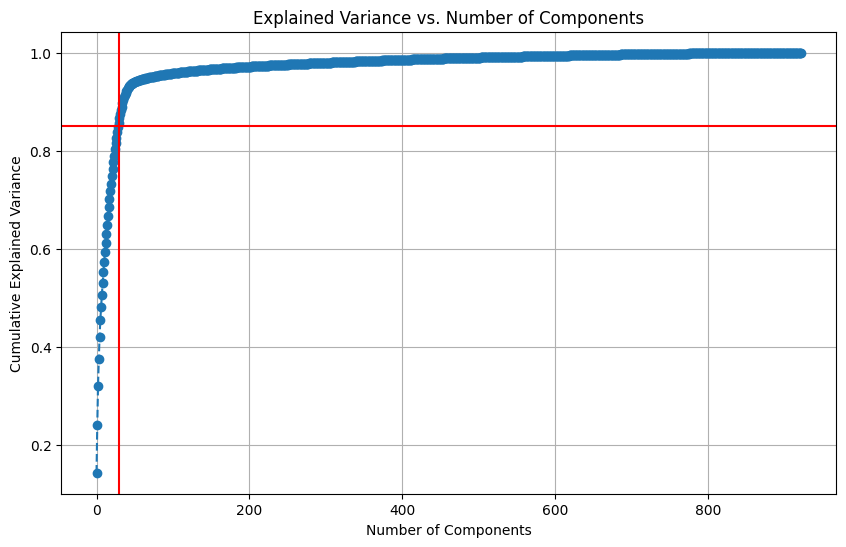

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

thereshold_PCA = 0.85  # 3 components will explain only 20% of the data variance

#df = df.drop('status')
#df = df.drop('status_code')

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(processed_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least thereshold_PCA of the variance
num_components = np.argmax(cumulative_explained_variance >= thereshold_PCA) + 1

print(f'Minimal number of components to explain {thereshold_PCA} variance: {num_components}')

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=thereshold_PCA, color='r', linestyle='-')
plt.axvline(x=num_components-1, color='r', linestyle='-')
plt.grid()
plt.show()

### PCA with 3 components

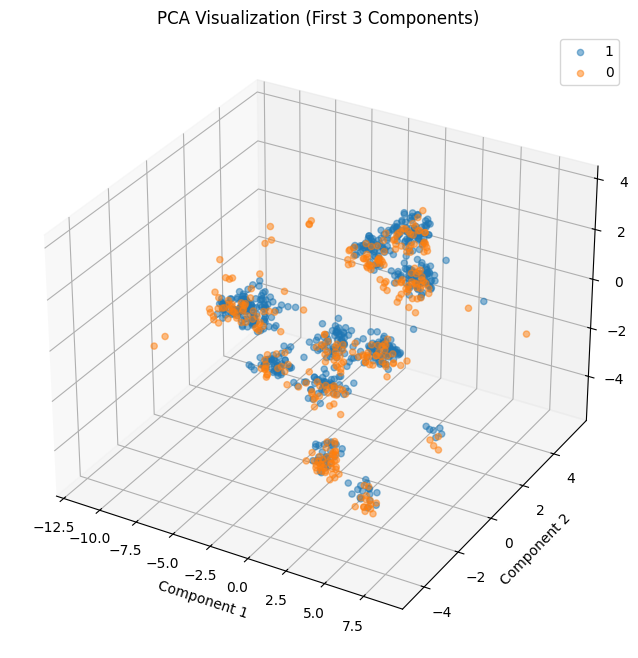

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Separate the 'status' column
status = df['status_code']

# Exclude the 'status' column from the features
df_pca = df.drop(columns=['status_code'])

# Identify categorical and numerical columns
categorical_columns = df_pca.select_dtypes(include=['object']).columns
numerical_columns = df_pca.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_pca[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_pca[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(processed_df)

# Create a DataFrame with the PCA results and the status
pca_df = pd.DataFrame(data=principalComponents, columns=['component_1', 'component_2', 'component_3'])
pca_df['status'] = status.values

# Plot the first three PCA components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for target in pca_df['status'].unique():
    subset = pca_df[pca_df['status'] == target]
    ax.scatter(subset['component_1'], subset['component_2'], subset['component_3'], label=target, alpha=0.5)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA Visualization (First 3 Components)')
ax.legend()
plt.show()

# T-SNE

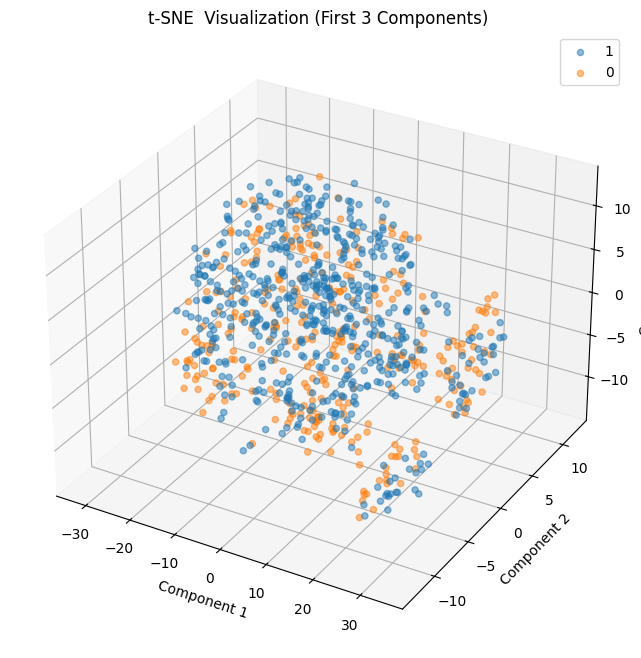

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

df_tsne = df

# Identify categorical and numerical columns
categorical_columns = df_tsne.select_dtypes(include=['object']).columns
numerical_columns = df_tsne.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_tsne[categorical_columns]).toarray()

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_tsne[numerical_columns])

# Combine encoded categorical and scaled numerical data
processed_data = np.hstack((encoded_categorical, scaled_numerical))

# Create a DataFrame with the processed data
processed_df = pd.DataFrame(processed_data)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)


# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(processed_df)

# Create a DataFrame with the t-SNE results and the status
tsne_df = pd.DataFrame(data=tsne_components, columns=['component_1', 'component_2', 'component_3'])
tsne_df['status'] = status.values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for target in tsne_df['status'].unique():
    subset = tsne_df[tsne_df['status'] == target]
    ax.scatter(subset['component_1'], subset['component_2'], subset['component_3'], label=target, alpha=0.5)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('t-SNE  Visualization (First 3 Components)')
ax.legend()
plt.show()

# Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   state_code                        923 non-null    object        
 1   latitude                          923 non-null    float64       
 2   longitude                         923 non-null    float64       
 3   zip_code                          923 non-null    object        
 4   city                              923 non-null    object        
 5   first_funding_at                  923 non-null    object        
 6   last_funding_at                   923 non-null    object        
 7   age_first_funding_year            923 non-null    float64       
 8   age_last_funding_year             923 non-null    float64       
 9   age_first_milestone_year          923 non-null    float64       
 10  age_last_milestone_year           923 non-null    

In [19]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  

Series([], dtype: int64)


In [20]:
df[['first_funding_at', 'last_funding_at', 'state_code', 'has_roundC', 'has_roundD']].head()

,first_funding_at,last_funding_at,state_code,has_roundC,has_roundD
0,4/1/2009,1/1/2010,CA,0,0
1,2/14/2005,12/28/2009,CA,1,1
2,3/30/2010,3/30/2010,CA,0,0
3,2/17/2005,4/25/2007,CA,1,1
4,8/1/2010,4/1/2012,CA,0,0


# XGBoost classifier

## train model

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

dataset_path = '../data/startup_data.csv'
df = read_and_adjust(file_name = dataset_path)

# df = read_and_adjust(file_name = 'startup_data.csv')

# Separate the 'status_code' column (target) and features
X = df.drop(columns=['status_code'])
y = df['status_code']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(X[categorical_columns])

# Create DataFrame from encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_columns])

# Create DataFrame from scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.2, random_state=20)


[*********************100%%**********************]  1 of 1 completed


# Train an XGBoost classifier

c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


threshold is 0.7
AUC-ROC: 0.8
Accuracy: 0.78
Ballanced Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.64        57
           1       0.83      0.86      0.85       128

    accuracy                           0.78       185
   macro avg       0.75      0.74      0.74       185
weighted avg       0.78      0.78      0.78       185

Confusion Matrix (Test):
[[ 35  22]
 [ 18 110]]


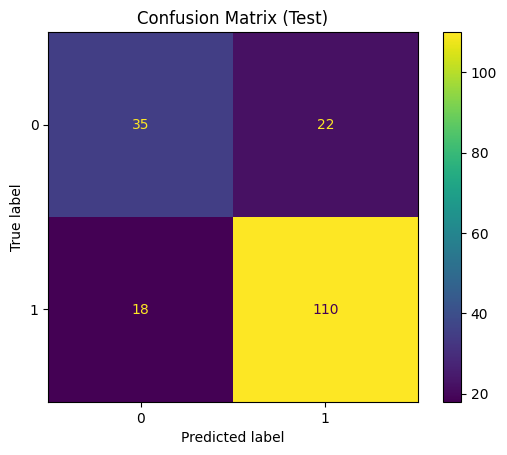

Precision (Test): 0.8333
Recall (Test): 0.8594


In [48]:
# Train an XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred_XGboost = xgb_clf.predict(X_test)
y_prob_XGboost = xgb_clf.predict_proba(X_test)[:, 1]

th = 0.7 #find_optimal_threshold(y_test, y_pred)

print(f'threshold is {th}')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_XGboost > th)
report = classification_report(y_test, y_pred_XGboost > th)
auc_roc = roc_auc_score(y_test, y_prob_XGboost)
print(f'AUC-ROC: {round(auc_roc, 2)}')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'Ballanced Accuracy: {round(balanced_accuracy_score(y_test, y_pred_XGboost > th), 2)}')
print('Classification Report:')
print(report)
show_ConfusionMatrix_test(y_test, y_pred_XGboost > th)
precision, recall = get_precision_and_recall(y_test,  y_pred_XGboost > th)
print(f"Precision (Test): {precision}")
print(f"Recall (Test): {recall}")

## feature importance

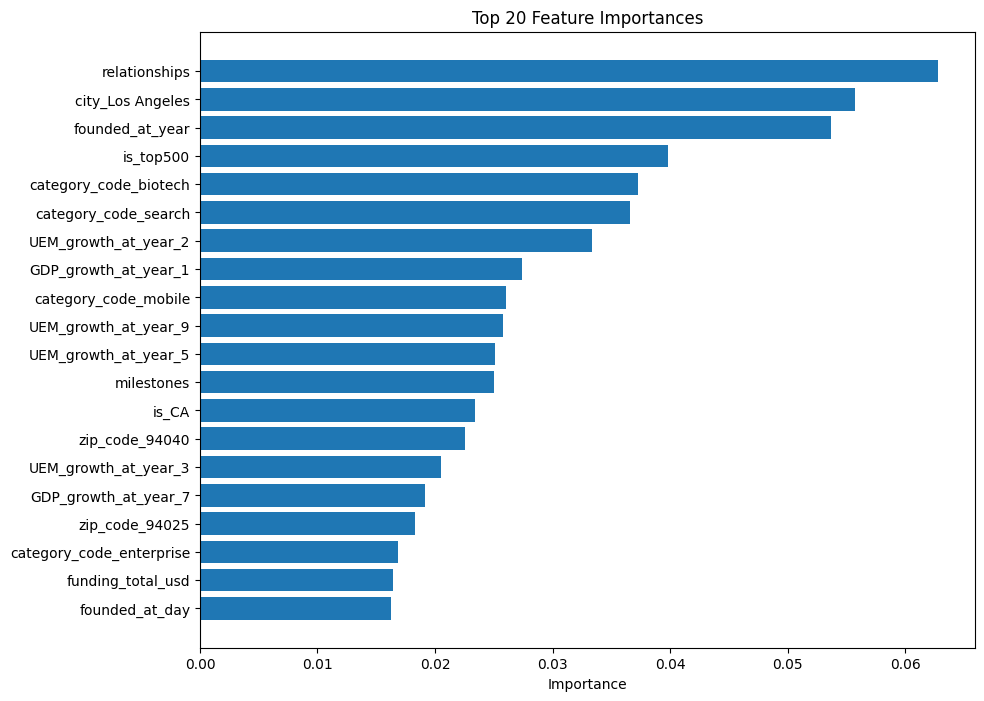

In [49]:
# Plot top 10 feature importances
num_of_features = 20
importance = xgb_clf.feature_importances_
feature_names = processed_df.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(num_of_features)



plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title((f'Top {num_of_features} Feature Importances'))
plt.gca().invert_yaxis()
plt.show()

## AUC-ROC curve

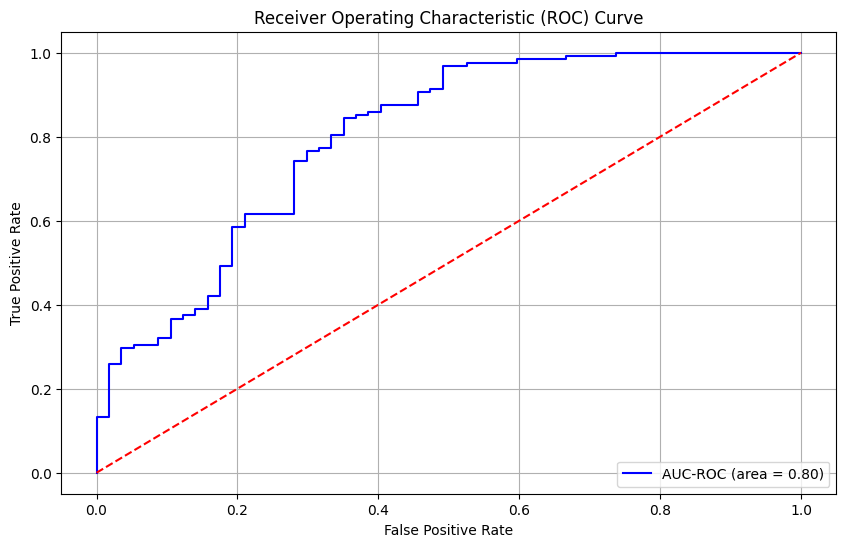

In [50]:
# Plot the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_XGboost)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Random Forest

threshold is 0.7
AUC-ROC: 0.79
Accuracy: 0.78
Ballanced Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.53      0.59        57
           1       0.81      0.89      0.85       128

    accuracy                           0.78       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.77      0.78      0.77       185

Confusion Matrix (Test):
[[ 30  27]
 [ 14 114]]


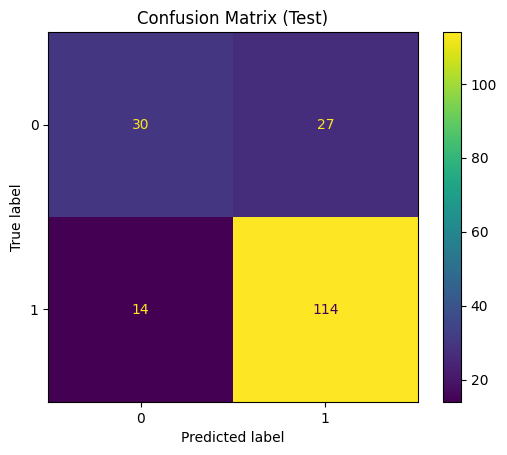

Precision (Test): 0.8085
Recall (Test): 0.8906


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

print(f'threshold is {th}')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf > th)
report = classification_report(y_test, y_pred_rf > th)
auc_roc = roc_auc_score(y_test, y_prob_rf)
print(f'AUC-ROC: {round(auc_roc, 2)}')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'Ballanced Accuracy: {round(balanced_accuracy_score(y_test, y_pred_rf > th), 2)}')
print('Classification Report:')
print(report)
show_ConfusionMatrix_test(y_test, y_pred_rf > th)
precision, recall = get_precision_and_recall(y_test,  y_pred_rf > th)
print(f"Precision (Test): {precision}")
print(f"Recall (Test): {recall}")

# SVM

AUC-ROC: 0.76
Accuracy: 0.74
Ballanced Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        57
           1       0.79      0.84      0.82       128

    accuracy                           0.74       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.73      0.74      0.73       185

Confusion Matrix (Test):
[[ 29  28]
 [ 20 108]]


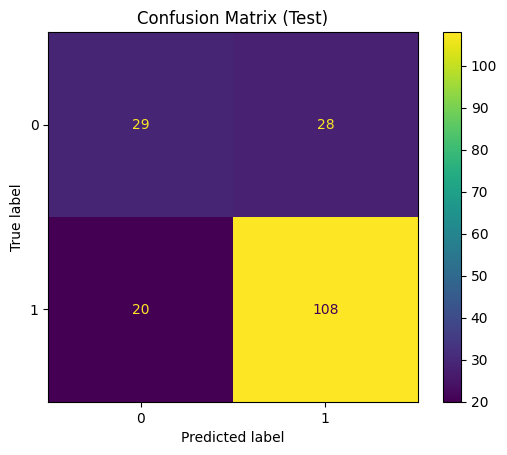

Precision (Test): 0.7941
Recall (Test): 0.8438


In [26]:
from sklearn.svm import SVC

# Initialize and train the model
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm > th)
report = classification_report(y_test, y_pred_svm > th)
auc_roc = roc_auc_score(y_test, y_prob_svm)
print(f'AUC-ROC: {round(auc_roc, 2)}')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'Ballanced Accuracy: {round(balanced_accuracy_score(y_test, y_pred_svm > th), 2)}')
print('Classification Report:')
print(report)
show_ConfusionMatrix_test(y_test, y_pred_svm > th)
precision, recall = get_precision_and_recall(y_test,  y_pred_svm > th)
print(f"Precision (Test): {precision}")
print(f"Recall (Test): {recall}")

## cross - validation

In [111]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, make_scorer, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = '../data/startup_data.csv'
df = read_and_adjust(file_name = dataset_path)

# df = read_and_adjust(file_name = 'startup data.csv')

# Separate the 'status_code' column (target) and features
X = df.drop(columns=['status_code'])
y = df['status_code']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(X[categorical_columns])

# Create DataFrame from encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_columns])

# Create DataFrame from scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.2, random_state=20)

# Train an XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score)
}

cv_results = cross_validate(xgb_clf, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)
print(f"Cross-Validation Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Mean Cross-Validation Accuracy: {round(cv_results['test_accuracy'].mean(), 2)}")
print(f"Cross-Validation Balanced Accuracy Scores: {cv_results['test_balanced_accuracy']}")
print(f"Mean Cross-Validation Balanced Accuracy: {round(cv_results['test_balanced_accuracy'].mean(), 2)}")
print(f"Cross-Validation AUC Scores: {cv_results['test_roc_auc']}")
print(f"Mean Cross-Validation AUC: {round(cv_results['test_roc_auc'].mean(), 2)}")
print(f"Cross-Validation Precision Scores: {cv_results['test_precision']}")
print(f"Mean Cross-Validation Precision: {round(cv_results['test_precision'].mean(), 2)}")
print(f"Cross-Validation Recall Scores: {cv_results['test_recall']}")
print(f"Mean Cross-Validation Recall: {round(cv_results['test_recall'].mean(), 2)}")
print(f"Cross-Validation F1 Scores: {cv_results['test_f1']}")
print(f"Mean Cross-Validation F1: {round(cv_results['test_f1'].mean(), 2)}")
print(f"Cross-Validation Kappa Scores: {cv_results['test_kappa']}")
print(f"Mean Cross-Validation Kappa: {round(cv_results['test_kappa'].mean(), 2)}")

[*********************100%%**********************]  1 of 1 completed
c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci

Cross-Validation Accuracy Scores: [0.83108108 0.77027027 0.77702703 0.76190476 0.65986395]
Mean Cross-Validation Accuracy: 0.76
Cross-Validation Balanced Accuracy Scores: [0.81579984 0.73640662 0.74960599 0.71918908 0.61081243]
Mean Cross-Validation Balanced Accuracy: 0.73
Cross-Validation AUC Scores: [0.89696612 0.82368006 0.80181245 0.76957045 0.68677818]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.86315789 0.79411765 0.80808081 0.78095238 0.7047619 ]
Mean Cross-Validation Precision: 0.79
Cross-Validation Recall Scores: [0.87234043 0.86170213 0.85106383 0.87234043 0.79569892]
Mean Cross-Validation Recall: 0.85
Cross-Validation F1 Scores: [0.86772487 0.82653061 0.82901554 0.8241206  0.74747475]
Mean Cross-Validation F1: 0.82
Cross-Validation Kappa Scores: [0.6340981  0.48820179 0.50924437 0.45916115 0.23245614]
Mean Cross-Validation Kappa: 0.46


# Plotting distributions of features between correct and incorrect predictions

In [113]:
# Create a DataFrame to store results
results_df = X_test.copy()
results_df['actual'] = y_test
results_df['predicted'] = y_pred_XGboost
results_df['correct'] = (y_pred_XGboost == y_test)#.astype(int)

# Separate correct and incorrect predictions
correct_predictions = results_df[results_df['correct'] == True]
incorrect_predictions = results_df[results_df['correct'] == False]

In [118]:
# Correlation analysis for incorrect predictions, to see which features correlate with the errors, focusing on predicted values
incorrect_corr = abs(incorrect_predictions.corr())
print("Correlation in Incorrect Predictions with Predicted Values:\n", incorrect_corr['predicted'].sort_values(ascending=False).head(15))


Correlation in Incorrect Predictions with Predicted Values:
 predicted                  1.000000
actual                     1.000000
UEM_growth_at_year_1       0.591255
GDP_growth_at_year_2       0.564100
UEM_growth_at_year_0       0.555319
founded_at_year            0.537108
UEM_growth_at_year_10      0.496142
GDP_growth_at_year_8       0.455434
GDP_growth_at_year_9       0.450261
GDP_growth_at_year_1       0.414159
UEM_growth_at_year_2       0.411409
GDP_growth_at_year_3       0.405646
age_last_milestone_year    0.383019
is_top500                  0.376922
is_NY                      0.368514
Name: predicted, dtype: float64


### The model might be over-relying on certain features related to GDP and unemployment rates for its predictions.

# Box Plot of Highly Correlated Features vs. Predicted Values

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\1996081511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=incorrect_predictions['predicted'], y=incorrect_predictions[feature], palette="Set1")


<Figure size 1000x600 with 0 Axes>

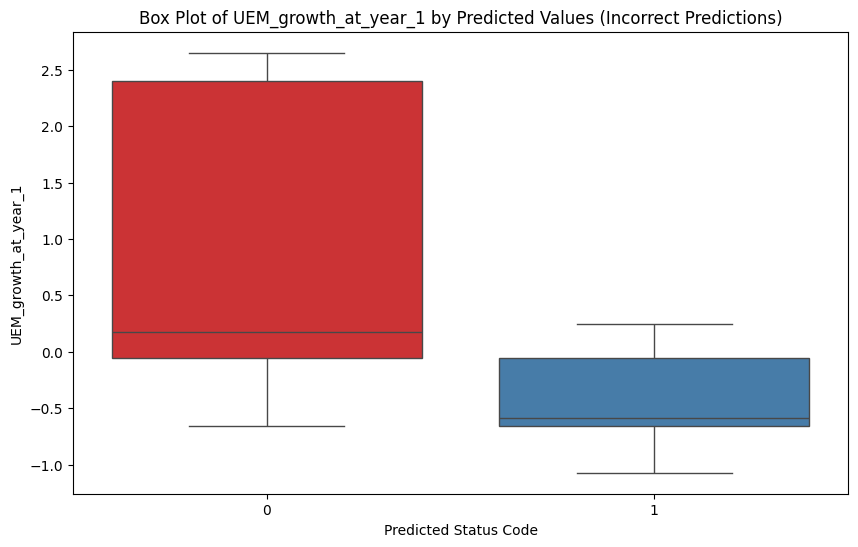

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\1996081511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=incorrect_predictions['predicted'], y=incorrect_predictions[feature], palette="Set1")


<Figure size 1000x600 with 0 Axes>

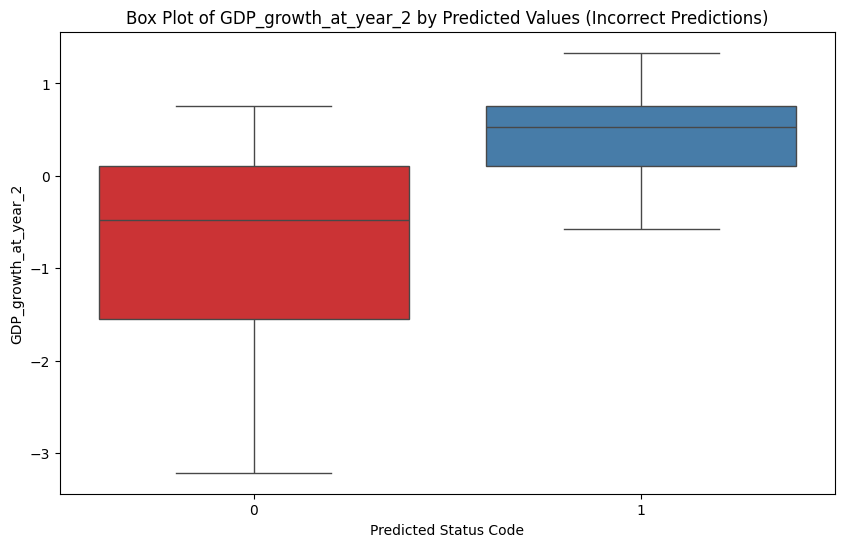

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\1996081511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=incorrect_predictions['predicted'], y=incorrect_predictions[feature], palette="Set1")


<Figure size 1000x600 with 0 Axes>

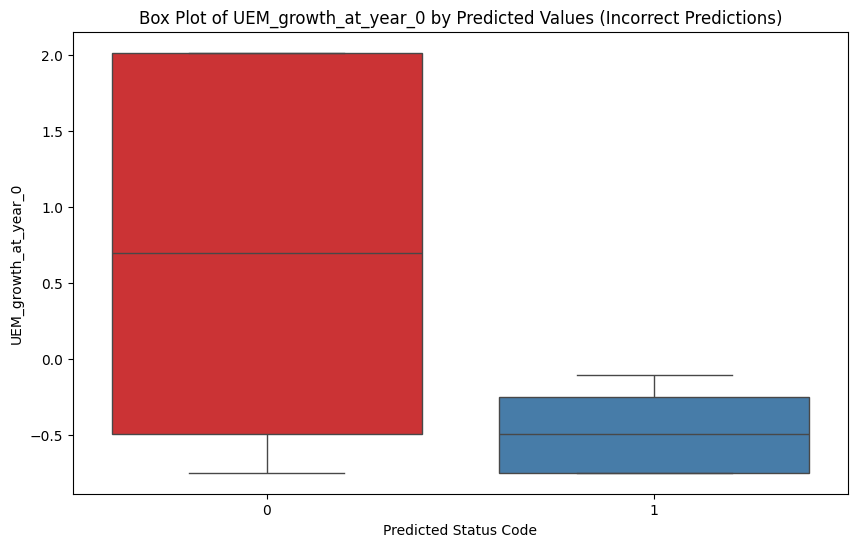

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\1996081511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=incorrect_predictions['predicted'], y=incorrect_predictions[feature], palette="Set1")


<Figure size 1000x600 with 0 Axes>

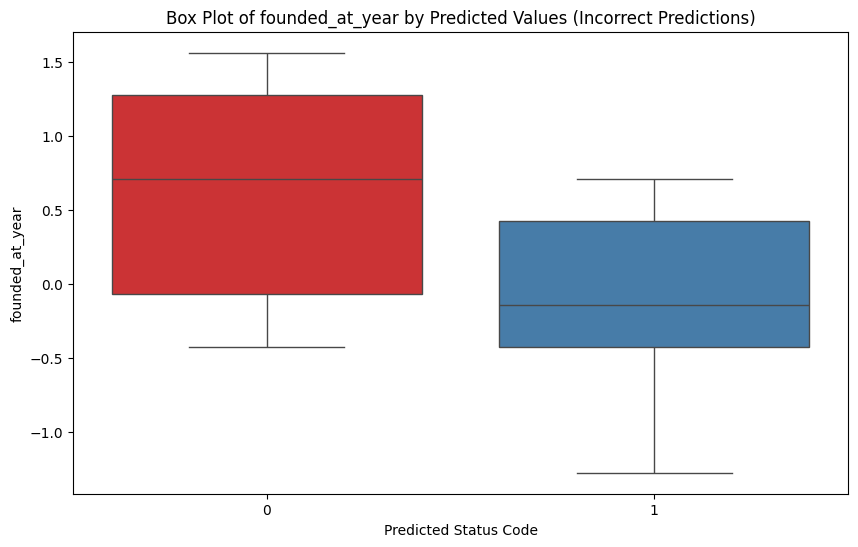

In [119]:
# Select the highly correlated features
highly_correlated_features = ['UEM_growth_at_year_1','GDP_growth_at_year_2','UEM_growth_at_year_0','founded_at_year']
for feature in highly_correlated_features:
    plt.figure(figsize=(10, 6))
    
    # # Box plot comparing the actual target values
    # sns.boxplot(x=incorrect_predictions['actual'], y=incorrect_predictions[feature], palette="Set2")
    # plt.title(f'Box Plot of {feature} by Actual Target Values')
    # plt.xlabel('Actual Status Code')
    # plt.ylabel(f'{feature}')
    # plt.show()
    
    # Box plot comparing the predicted values
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=incorrect_predictions['predicted'], y=incorrect_predictions[feature], palette="Set1")
    plt.title(f'Box Plot of {feature} by Predicted Values (Incorrect Predictions)')
    plt.xlabel('Predicted Status Code')
    plt.ylabel(f'{feature}')
    plt.show()



Large overlaps might indicate that the model struggles to differentiate between classes based on those features.

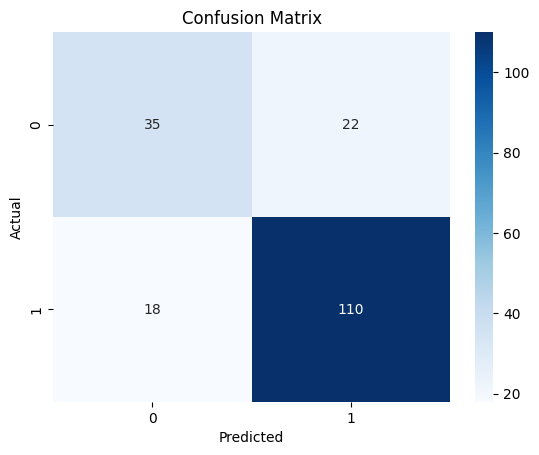

In [47]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_XGboost)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\529004025.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_original_df['relationships'], shade=True, label='Correct', color='g')
C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\529004025.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incorrect_original_df['relationships'], shade=True, label='Incorrect', color='r')
C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\529004025.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_original_df['founded_at_year'], shade=True, label='Correct', color='g')
C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\5

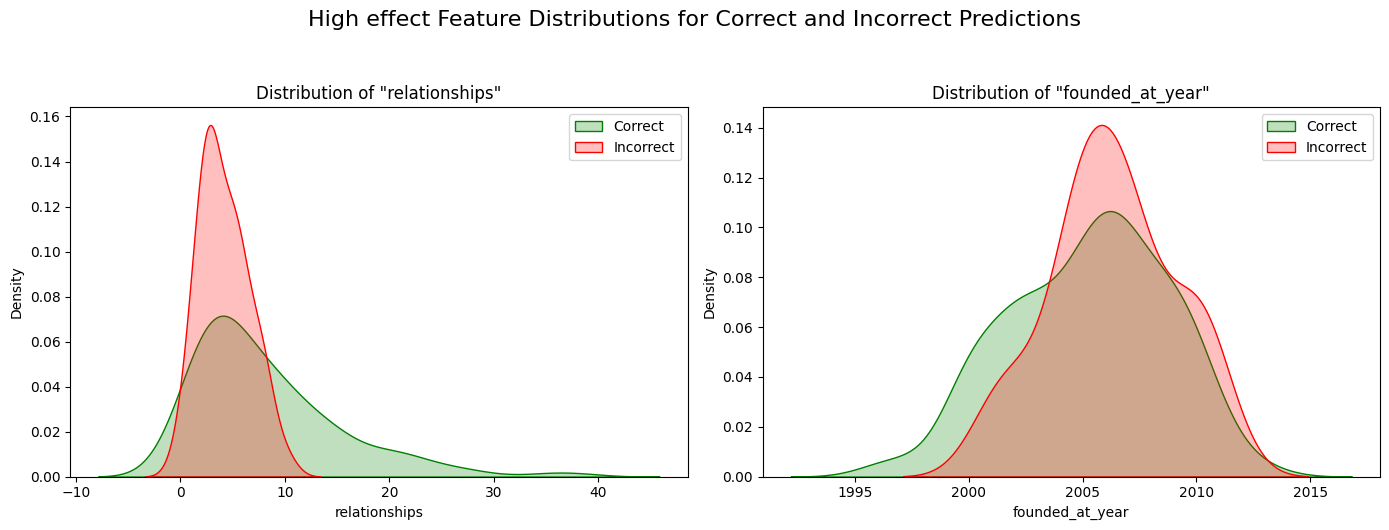

In [36]:
plt.figure(figsize=(14, 5))

# Plot distribution for relationships on the left
plt.subplot(1, 2, 1)
sns.kdeplot(correct_original_df['relationships'], shade=True, label='Correct', color='g')
sns.kdeplot(incorrect_original_df['relationships'], shade=True, label='Incorrect', color='r')
plt.title('Distribution of "relationships"')
plt.legend()

# Plot distribution for founded_at_year on the right
plt.subplot(1, 2, 2)
sns.kdeplot(correct_original_df['founded_at_year'], shade=True, label='Correct', color='g')
sns.kdeplot(incorrect_original_df['founded_at_year'], shade=True, label='Incorrect', color='r')
plt.title('Distribution of "founded_at_year"')
plt.legend()

# Add a big title to the entire figure
plt.suptitle('High effect Feature Distributions for Correct and Incorrect Predictions', fontsize=16, y=1.05)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\4175007774.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_predictions['relationships'], shade=True, label='Correct', color='g')
C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\4175007774.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incorrect_predictions['relationships'], shade=True, label='Incorrect', color='r')
C:\Users\oralo\AppData\Local\Temp\ipykernel_65456\4175007774.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_predictions['founded_at_year'], shade=True, label='Correct', color='g')
C:\Users\oralo\AppData\Local\Temp\ipykernel_6545

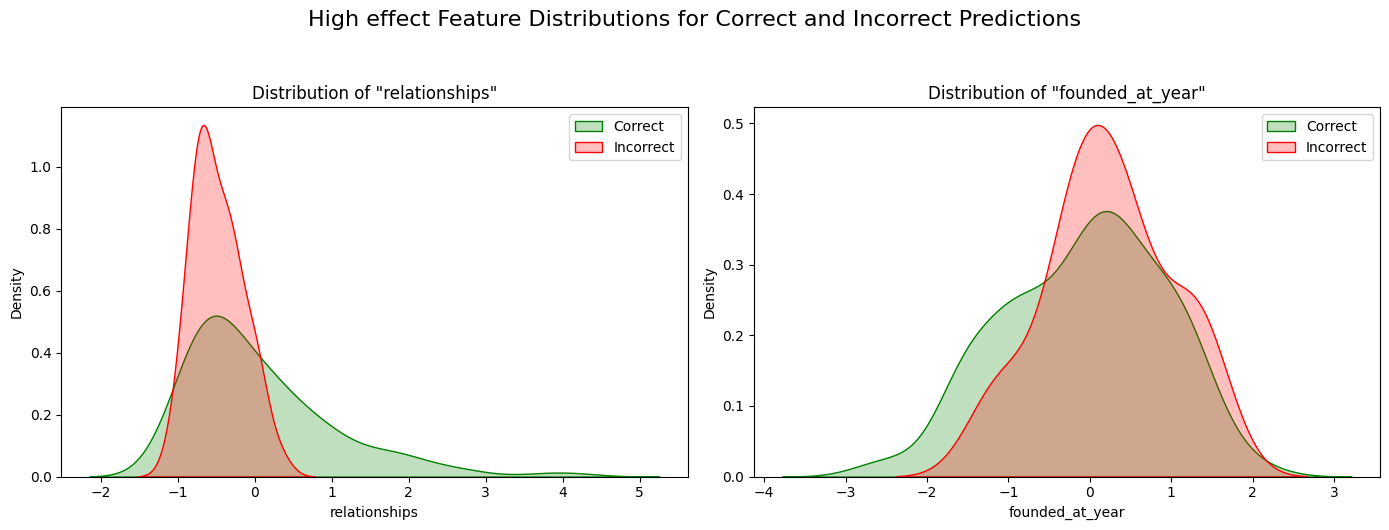

In [29]:
plt.figure(figsize=(14, 5))

# Plot distribution for relationships on the left
plt.subplot(1, 2, 1)
sns.kdeplot(correct_predictions['relationships'], shade=True, label='Correct', color='g')
sns.kdeplot(incorrect_predictions['relationships'], shade=True, label='Incorrect', color='r')
plt.title('Distribution of "relationships"')
plt.legend()

# Plot distribution for founded_at_year on the right
plt.subplot(1, 2, 2)
sns.kdeplot(correct_predictions['founded_at_year'], shade=True, label='Correct', color='g')
sns.kdeplot(incorrect_predictions['founded_at_year'], shade=True, label='Incorrect', color='r')
plt.title('Distribution of "founded_at_year"')
plt.legend()

# Add a big title to the entire figure
plt.suptitle('High effect Feature Distributions for Correct and Incorrect Predictions', fontsize=16, y=1.05)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

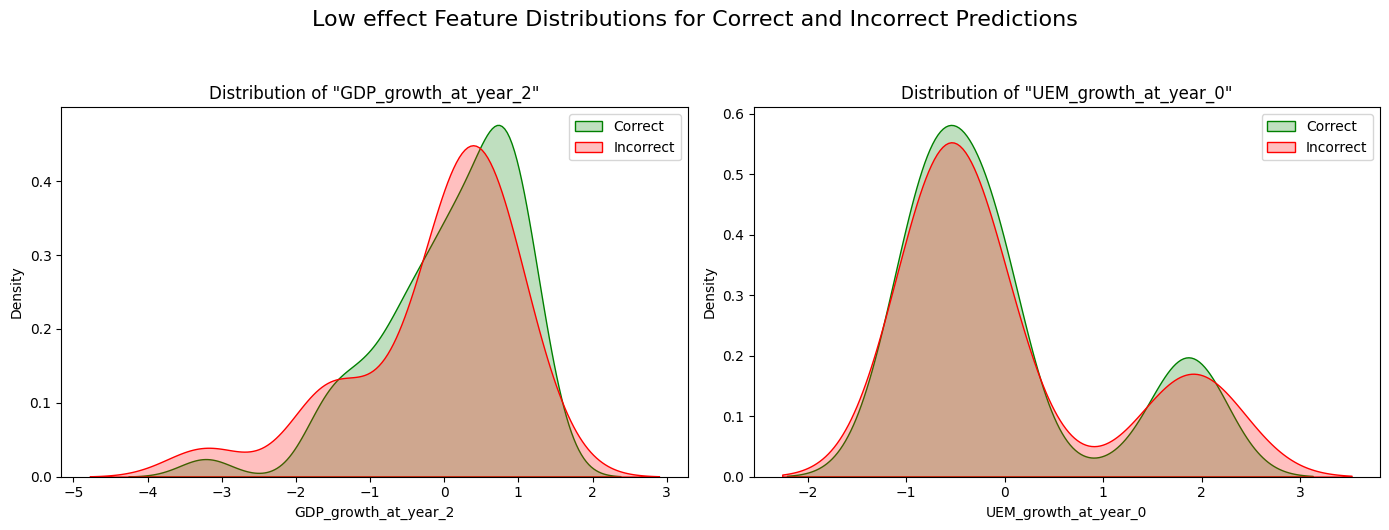

In [30]:
plt.figure(figsize=(14, 5))

# Plot distribution for relationships on the left
plt.subplot(1, 2, 1)
sns.kdeplot(correct_predictions['GDP_growth_at_year_2'], fill=True, label='Correct', color='g')
sns.kdeplot(incorrect_predictions['GDP_growth_at_year_2'], fill=True, label='Incorrect', color='r')
plt.title('Distribution of "GDP_growth_at_year_2"')
plt.legend()

# Plot distribution for founded_at_year on the right
plt.subplot(1, 2, 2)
sns.kdeplot(correct_predictions['UEM_growth_at_year_0'], fill=True, label='Correct', color='g')
sns.kdeplot(incorrect_predictions['UEM_growth_at_year_0'], fill=True, label='Incorrect', color='r')
plt.title('Distribution of "UEM_growth_at_year_0"')
plt.legend()

# Add a big title to the entire figure
plt.suptitle('Low effect Feature Distributions for Correct and Incorrect Predictions', fontsize=16, y=1.05)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<!-- # Plot distribution for important features -->


# Statistics

In [67]:
from scipy.stats import spearmanr, pearsonr

status_code = df['status_code']

def print_correlations_Spearman_and_Pearson(col1, status_code, text = ''):
  # Calculate Spearman and Pearson correlations
  spearman_corr, spearman_p_value = spearmanr(col1, status_code)
  pearson_corr, pearson_p_value = pearsonr(col1, status_code)

  print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")
  print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

In [68]:
df['category_code_biotech'] = df['category_code'].apply(lambda x: 1 if x == 'biotech' else 0) #only 34 samples with 1
print_correlations_Spearman_and_Pearson(df['category_code_biotech'], df['status_code'])

Spearman correlation: 0.00010430465294688177, p-value: 0.9974750374061483
Pearson correlation: 0.00010430465294689051, p-value: 0.9974750374061471


In [69]:
print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])

Spearman correlation: 0.466947609250253, p-value: 3.63257569528578e-51
Pearson correlation: 0.3604336437709976, p-value: 1.06787429277123e-29


In [70]:
print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])

Spearman correlation: 0.226498446014084, p-value: 3.3408410636154857e-12
Pearson correlation: 0.18599162866024171, p-value: 1.2506004126542971e-08


In [71]:
print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])

Spearman correlation: 0.1659015104590796, p-value: 4.008095143462745e-07
Pearson correlation: 0.16590151045907986, p-value: 4.008095143462563e-07


In [72]:
print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

Spearman correlation: 0.13994040612339836, p-value: 1.9832511468107988e-05
Pearson correlation: 0.13994040612339878, p-value: 1.9832511468106074e-05


In [73]:
df.head()

,state_code,latitude,longitude,zip_code,city,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,UEM_growth_at_year_2,UEM_growth_at_year_3,UEM_growth_at_year_4,UEM_growth_at_year_5,UEM_growth_at_year_6,UEM_growth_at_year_7,UEM_growth_at_year_8,UEM_growth_at_year_9,UEM_growth_at_year_10,category_code_biotech
0,CA,42.358880,-71.056820,92101,San Diego,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,...,5.084,5.529,5.989,5.783,4.731,3.992,4.219,4.511,5.000,0
1,CA,37.238916,-121.973718,95032,Los Gatos,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,...,4.511,5.000,5.451,5.650,6.119,6.900,7.500,6.800,NaN,0
2,CA,32.901049,-117.192656,92121,San Diego,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,...,4.622,4.623,5.084,5.529,5.989,5.783,4.731,3.992,4.219,0
3,CA,37.320309,-122.050040,95014,Cupertino,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,...,3.992,4.219,4.511,5.000,5.451,5.650,6.119,6.900,7.500,0
4,CA,37.779281,-122.419236,94105,San Francisco,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,...,5.784,4.622,4.623,5.084,5.529,5.989,5.783,4.731,3.992,0


In [74]:
df['UEM_at_year_0']

KeyError: 'UEM_at_year_0'

In [75]:
df['gdp_growth_at_year_0']

KeyError: 'gdp_growth_at_year_0'

In [ ]:
# nasdaq is a better prediction feature then inflation
print('unemployment_at_year_0')
print_correlations_Spearman_and_Pearson(df['gdp_growth_at_year_0'], df['status_code'])
print('')
print('nasdaq_annual_changes_at_year_0')
print_correlations_Spearman_and_Pearson(df['nasdaq_annual_changes_at_year_0'], df['status_code'])

In [ ]:
#print_correlations_Spearman_and_Pearson(df['gdp_growth_at_year_0'], df['status_code'])